<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/Raw_House_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import folium
from folium.plugins import FastMarkerCluster
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

from pandas import DataFrame
from numpy import arange
from pandas import read_csv
from matplotlib import pyplot

from scipy.stats import multivariate_normal as mvn


In [2]:
#Regression
class KNNregression():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=2e-3):
   N= len(X)
   y_hat= np.zeros(N)
   for i in range(N):
     dist2= np.sum((self.X-X[i])**2, axis=1)
     idxt= np.argsort(dist2)[:K]
     gamma_k= np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum() + epsilon)
     y_hat[i]= gamma_k.dot(self.y[idxt])

   return y_hat

In [3]:
def OLS(Y,Y_hat):
  N=Y.shape[0]
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [4]:
class OurLinearRegression():
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):

    epochs = int(epochs)
    N, D = X.shape
    Y = y

    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):

      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Trainig Curve")

  def predict(self, X):
    return X@self.W
  




In [5]:
#Load data, Create column full of log values, drop unnecessary column
data= pd.read_csv('/content/drive/MyDrive/Final_House_Data.csv')
data=data.iloc[:,1:]

In [6]:
#data['price_per_ft']= data['sold_price']/data['sqrt_ft']

In [7]:
#def cat(x):
 #   if x <126:
  #      return 0
   # if 126<= x < 252:
    #    return 1
    #if 252<= x < 378:
     #   return 2
    #if 378<= x < 504:
     #   return 3
    #if x > 504:
     #   return 4
#data['classes'] = data['price_per_ft'].apply(lambda x: cat(x))

In [8]:
#create training set from 80%
#train_data = data.iloc[0:3813,:]
#load training set
train_data = pd.read_csv('/content/drive/MyDrive/House_training_data.csv')
#train_data=train_data.iloc[:,1:]

In [9]:
#create test set from 20%
#test_data = data.iloc[3813:,:]
test_data = data.loc[~data.index.isin(train_data.index)]
#load test set
#test_data = pd.read_csv('/content/drive/MyDrive/House_test_data.csv')
#test_data = test_data.iloc[:,1:]

In [10]:
test_data.head(1)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,z_score_sold,z_score_bedroom,z_score_bathroom,z_score_sqft,z_score_fireplace,address,price_per_ft,classes
3813,21413228,565000.0,85737,-110.950512,32.388109,0.16,4867.5,1993,3,4.0,3498.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Natural Stone",78.0,-0.658118,-0.749897,0.122574,-0.193881,-0.767309,"10061, Bighorn Butte Drive, Oro Valley, Pima C...",161.520869,1


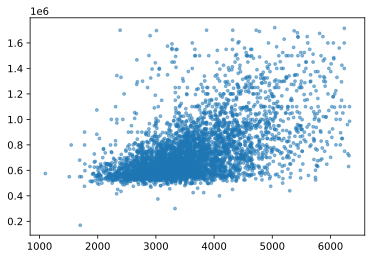

In [11]:
plt.scatter((data['sqrt_ft']), (data['sold_price']), s=8, alpha=0.5)

plt.show()

In [12]:
y = train_data.iloc[:,1]

In [13]:
y= y.to_numpy()
y.shape

(3813,)

In [14]:
X=train_data[['bedrooms','bathrooms','fireplaces','sqrt_ft', 'classes']].copy()

In [15]:
X=X.to_numpy()

In [16]:
myLireg = OurLinearRegression()

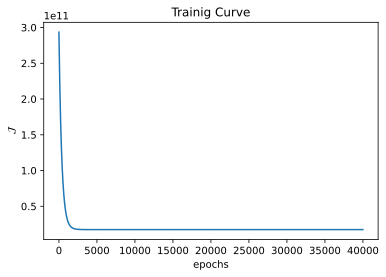

In [17]:
myLireg.fit(X,y,eta=1e-10,epochs=4e4, show_curve=True)

In [18]:
def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [19]:
y_hat= myLireg.predict(X)

In [20]:
R2(y, y_hat)

0.25284155186355306

In [21]:
#guess here
#bed, bath, fire, sqft, class
x_test = np.array([[4,3,1,2500,1]])

In [22]:
myLireg.predict(x_test)

array([507752.56716793])

In [23]:
knn = KNNregression()

In [24]:
knn.fit(X,y)

In [25]:
knn_yhat = knn.predict(X,100)

In [26]:
R2(y, knn_yhat)

0.9680847279532042

In [27]:
knn.predict(x_test,10)

array([598928.86814824])

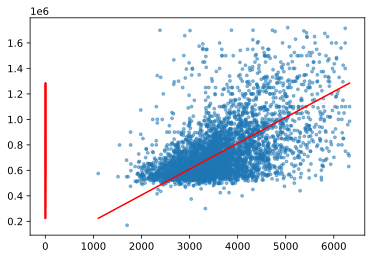

In [28]:
 plt.scatter((data['sqrt_ft']), data['sold_price'], s=8, alpha=0.5)

 plt.plot(X, y_hat, color='#FF0000')

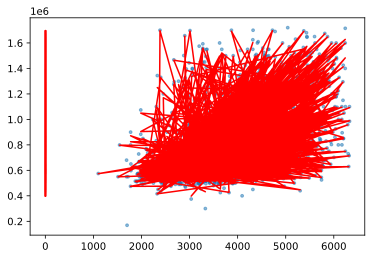

In [29]:
 plt.scatter((data['sqrt_ft']), data['sold_price'], s=8, alpha=0.5)

 plt.plot(X, knn_yhat, color='#FF0000')

In [33]:
%%capture
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Raw_House_Regression.ipynb"